In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
beers = pd.read_csv("data/processed/beers.csv", index_col="id")
beers.head()

,name,abv,style,style_detailed,min_ibu,max_ibu,alcohol,astringency,bitter,body,...,brewery_type_store,availability,retired,rating_source,rating_reviews_look,rating_reviews_smell,rating_reviews_taste,rating_reviews_feel,rating_reviews_overall,rating_reviews_score
id,,,,,,,,,,,,,,,,,,,,,
64620,the citizen,6.00,california common / steam beer,california common / steam beer,35,45,7,18,45,40,...,0,year-round,0,3.74,NaN,NaN,NaN,NaN,NaN,NaN
82938,arthur,4.20,mild ale - english pale,english pale mild ale,15,25,0,4,16,17,...,0,rotating,0,3.64,NaN,NaN,NaN,NaN,NaN,NaN
8107,medalla light,4.00,lager - light,american light lager,8,12,10,15,9,12,...,0,year-round,0,2.82,NaN,NaN,NaN,NaN,NaN,NaN
3940,imperial,4.50,lager - adjunct,american adjunct lager,8,18,4,34,22,23,...,0,year-round,0,2.80,3.0,2.75,3.0,3.0,3.0,2.8
34877,collaboration not litigation ale,8.72,strong ale - belgian dark,belgian strong dark ale,25,50,24,10,11,49,...,0,rotating,0,3.93,NaN,NaN,NaN,NaN,NaN,NaN


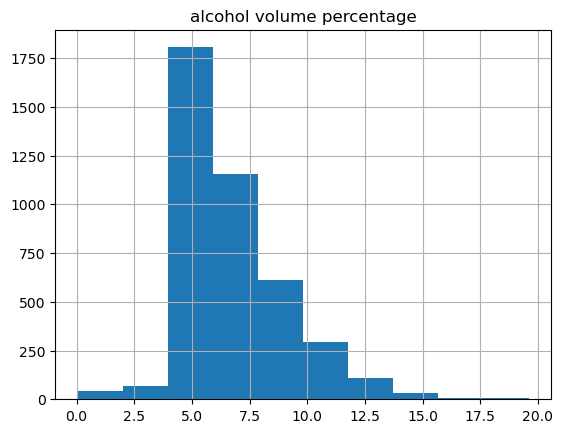

In [4]:
ax = beers.abv.hist()
_ = ax.set_title("alcohol volume percentage")

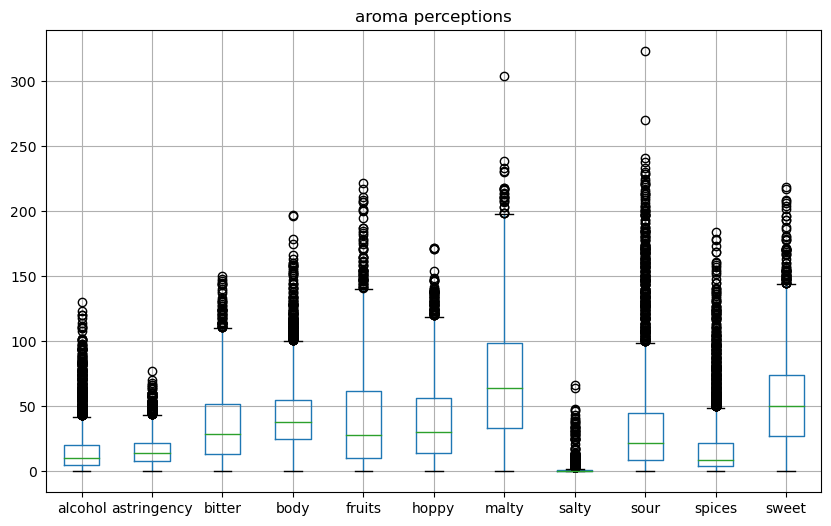

In [5]:
ax = beers.boxplot(column=['alcohol', 'astringency', 'bitter', 'body', 'fruits', 'hoppy', 'malty', 'salty', 'sour', 'spices', 'sweet'], figsize=(10,6))
_ = ax.set_title("aroma perceptions")

In [6]:
beers[['brewery_type_bar', 'brewery_type_beer_to_go',
       'brewery_type_eatery', 'brewery_type_homebrew', 'brewery_type_brewery',
       'brewery_type_store']].sum()

brewery_type_bar           2575
brewery_type_beer_to_go    2109
brewery_type_eatery        1309
brewery_type_homebrew        25
brewery_type_brewery       4135
brewery_type_store            0
dtype: int64

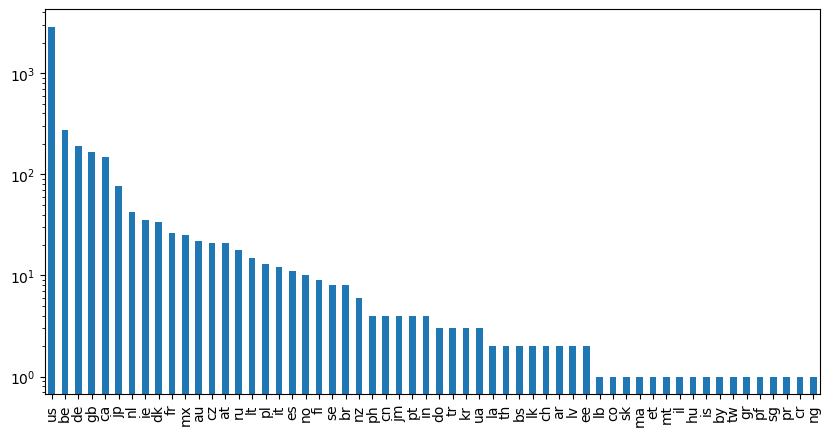

In [7]:
ax = beers["country"].value_counts().plot(kind='bar', figsize=(10,5))
_ = ax.set_title("")
plt.yscale('log')

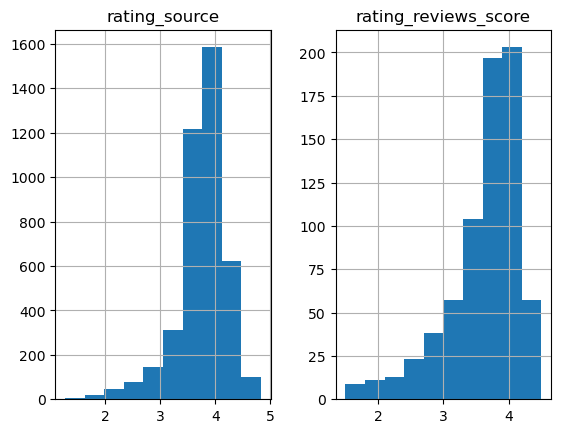

In [8]:
ax = beers.hist(column=['rating_source', 'rating_reviews_score'])

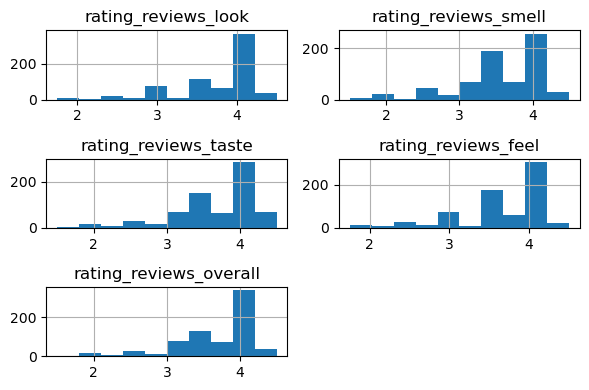

In [12]:
ax = beers.hist(column=['rating_reviews_look', 'rating_reviews_smell', 'rating_reviews_taste',
       'rating_reviews_feel', 'rating_reviews_overall'], figsize=(6,4))
plt.tight_layout()
plt.show()

In [10]:
beers.columns

Index(['name', 'abv', 'style', 'style_detailed', 'min_ibu', 'max_ibu',
       'alcohol', 'astringency', 'bitter', 'body', 'fruits', 'hoppy', 'malty',
       'salty', 'sour', 'spices', 'sweet', 'brewery_name', 'city', 'state',
       'country', 'brewery_type_bar', 'brewery_type_beer_to_go',
       'brewery_type_eatery', 'brewery_type_homebrew', 'brewery_type_brewery',
       'brewery_type_store', 'availability', 'retired', 'rating_source',
       'rating_reviews_look', 'rating_reviews_smell', 'rating_reviews_taste',
       'rating_reviews_feel', 'rating_reviews_overall',
       'rating_reviews_score'],
      dtype='object')